# Steps
1. Import everything
2. Main Method
3. Read in File
4. Extract spoken text
5. Count spoken words by character
6. Charts, charts, charts!!!



## 1. Import everything

In [1]:
import nltk
import re
from collections import Counter, defaultdict
from pprint import pprint
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

## 2. Main Method

In [ ]:
script = input_script(input("Pfad des einzulesenden Textes: "))


## 3. Read in File

In [ ]:
def input_script(pfad):
    
    with open(pfad,"r") as myfile:
            data = myfile.read().replace('\n',' ')
    return data

## 4. Extract and count spoken text

In [122]:
script = re.sub(r"[\?|\.|,|;|\!|&|-|']", " ", script)

In [123]:
# with codecs.open(script, 'r', 'utf8') as f:

  #read the file content
  # f = f.read()
script = re.sub(r"\(.*\)", "", script)
  # store all the clean text that's accumulated
spoken_text = ''

  # split the file into a list of strings, with each line a member in the list
for line in script.split('\n'):

    # split the line into a list of words in the line
    words = line.split()

    # if there are no words, do nothing
    if not words:
        continue

    # if this line is a person identifier, do nothing
    if len(words[0]) > 1 and all([i.isupper() for i in words[0]]):
        continue

    # if there's a good amount of whitespace to the left, this is a spoken line
    if len(line) - len(line.lstrip()) > 4:
        spoken_text += line.strip() + ' '

spoken = nltk.word_tokenize(spoken_text)

print(spoken)
dialog = len(spoken)
print(dialog)

['Written', 'by', 'Rhett', 'Reese', 'Paul', 'Wernick', 'Final', 'Shooting', 'Script', '-', 'November', '16', '2015', 'Kinda', 'lonesome', 'back', 'here', 'Little', 'help', 'Dopinder', 'Pool', 'Deadpool', 'Why', 'the', 'fancy', 'red', 'suit', 'Mr', 'Pool', 'It', 's', 'like', 'Christmas', 'Day', 'Dopinder', 'Been', 'waiting', 'one', 'thousand', 'eight', 'hundred', 'twenty-', 'two', 'days', 'three', 'hours', '(', 'checks', '`', 'Adventure', 'Time', 'watch', ')', 'and', 'thirty-six', 'minutes', 'for', 'this', 'shit', '2', 'Deadpool', 'Final', 'Shooting', 'Script', '11/16/15', 'Nice', 'Smells', 'good', 'no', 'Not', 'the', 'Daffodil', 'Daydream', 'The', 'girl', 'Ah', 'yes', 'Gita', 'She', 'is', 'quite', 'lovely', 'She', 'was', 'supposed', 'to', 'make', 'me', 'a', 'very', 'agreeable', 'wife', 'Mom', 'and', 'Dad', 'chose', 'her', 'rather', 'excellently', 'But', 'Gita', 's', 'heart', 'has', 'been', 'stolen', 'by', 'my', 'cousin', 'Bandhu', 'Bandhu', 'is', 'as', 'dishonorable', 'as', 'he', 'is',

## 5. Count spoken words by character

In [124]:
spoken_text = ""

words_spoken = defaultdict(Counter)
currently_speaking = ""
speaking_people = []

for line in script.split('\n'):
    name = line.replace('(CONT\'D)', '').strip()
    if re.match('^[A-Z]+$', name):
        currently_speaking = name
        speaking_people.append(currently_speaking)
    else:
        words_spoken[currently_speaking].update(line.split())


character1 = input("Enter name of character:")
character2 = input("Enter name of another character:")
character3 = input("Character:")
character4 = input("Character:")

sumchar1 = sum(words_spoken[character1].values())
sumchar2 = sum(words_spoken[character2].values())
sumchar3 = sum(words_spoken[character3].values())
sumchar4 = sum(words_spoken[character4].values())
print(sumchar1)
print(sumchar2)
print(sumchar3)
print(sumchar4)

words_spoken.pop('')
print(words_spoken)

Enter name of character:DEADPOOL
Enter name of another character:WADE
Character:VANESSA
Character:
11265
4634
1413
0
defaultdict(<class 'collections.Counter'>, {'DEADPOOL': Counter({'the': 529, 'a': 233, 'to': 209, 'Deadpool': 201, 's': 192, 'of': 184, 'and': 181, 'I': 129, 'his': 117, 'in': 115, 'The': 98, '-': 93, 'it': 77, 'on': 76, 'is': 73, 'you': 73, 'with': 63, 'up': 57, 'into': 56, 'her': 53, 'out': 51, 'Final': 49, 'Shooting': 49, 'Script': 49, '11/16/15': 48, 'as': 47, 'him': 46, 'for': 46, 'he': 44, 'CONTINUED:': 44, 'He': 43, 'from': 42, 'A': 40, 'like': 37, 'Ajax': 37, 'through': 36, 'DEADPOOL': 36, 'down': 36, 'back': 33, 'your': 33, 'BLIND': 33, 't': 32, 'that': 32, 'me': 32, 'AL': 32, 'S': 31, 'an': 31, 'this': 30, 'by': 29, 'then': 29, 'And': 29, 'at': 29, 'You': 29, 'm': 28, 'one': 27, 'AJAX': 27, 're': 26, 'INT': 24, 'over': 23, 'Wade': 23, 'we': 23, 'face': 22, 'EXT': 21, 'head': 21, 'It': 21, 'can': 21, 'DAY': 21, 'Angel': 21, 'Dust': 21, 'two': 20, 'be': 20, 'behi

## 6. Charts, charts, charts

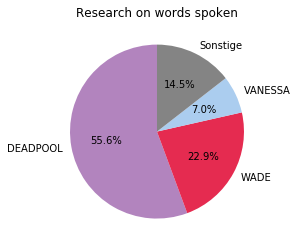

In [126]:
#Diagramme

labels = [character1,character2,character3]
values = [sumchar1,sumchar2,sumchar3]
sonstige = dialog - sumchar1 - sumchar2 - sumchar3 

word_counts = [sumchar1, sumchar2, sumchar3, sonstige]
names = [character1, character2, character3,  "Sonstige"]
colors = ['#66Cdaa', '#87CeFa', '#9370dB', '#848484']
plt.pie(word_counts, labels=names, colors=colors, startangle=90, autopct='%.1f%%')
plt.title('Research on words spoken')
plt.show()
# pprint(set(speaking_people))